## **Import Libraries**

In [8]:
#Import and setup matplotlib:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
!pip install seaborn wordcloud

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud

# check for latest version of Matplotlib and seaborn
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.7.1
Seaborn version:  0.13.1
WordCloud version:  1.9.3


In [1]:
#if you get attribute error while generating worldcloud, upgrade Pillow and numpy using below code
%pip install --upgrade Pillow
%pip install --upgrade numpy

## Import WordCloud ans STOPWORDS libraries and create a variable that hold the link of the text that you want to show

In [4]:
from wordcloud import WordCloud,STOPWORDS
import urllib

novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")



Take objects from wordcloud and stopwords

In [10]:
stopword = set(STOPWORDS)
woc = WordCloud()
woc.generate(novel)

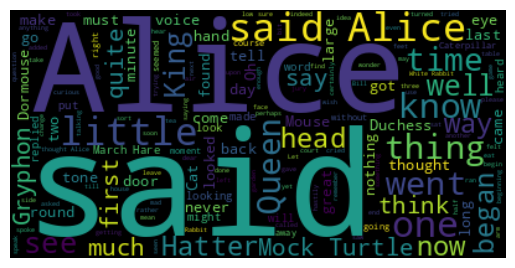

In [14]:
plt.imshow(woc,interpolation='bilinear')
plt.axis('off')
plt.show()

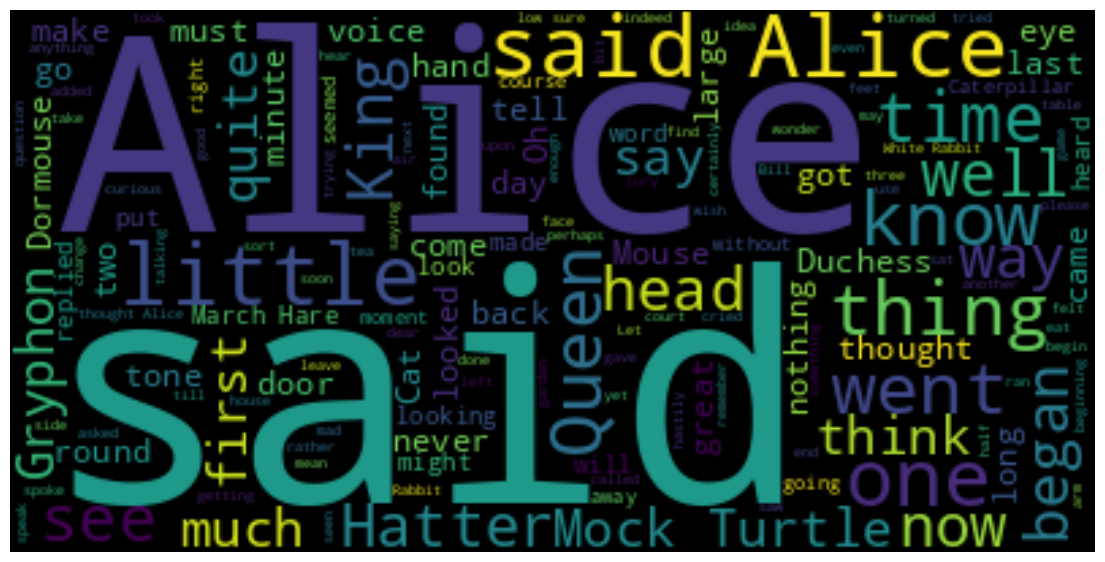

In [15]:
stopword.add('said') # if you want to add word to the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(woc,interpolation='bilinear')
plt.axis('off')
plt.show()

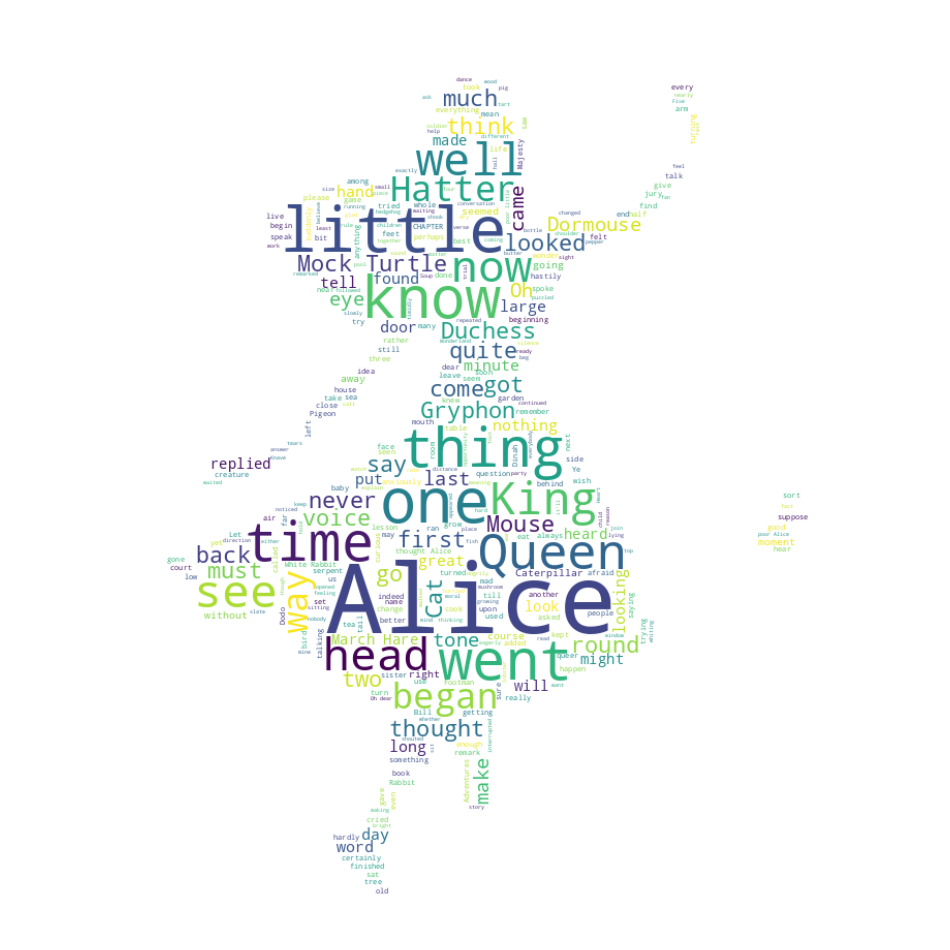

In [19]:
#To make a background mask
mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

alice_wc = WordCloud(max_words=2000,background_color='white',mask=mask,stopwords=stopword)
alice_wc.generate(novel)

fig = plt.figure(figsize=(12,16))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()


## **Lets apply the word cloud on the  Immigration to Canada from 1980 to 2013**

In [20]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [21]:
#set Country as index
df_can.set_index('Country', inplace=True)

In [22]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [24]:
#And what was the total immigration from 1980 to 2013?
immigrants = df_can['Total'].sum()
immigrants

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.




In [26]:
max_word = 200
word_str= ''

for country in df_can.index.values:
  if country.count(' ') == 0:
    repeat = int(df_can.loc[country,'Total']/immigrants*max_word)
    word_str = word_str+((country+' ')*repeat)

word_str


'Afghanistan Algeria Algeria Bangladesh Bangladesh China China China China China China China China China China China China China China China China China China China China Colombia Colombia Egypt Egypt Ethiopia France France France Germany Guyana Guyana Haiti Haiti India India India India India India India India India India India India India India India India India India India India India Iraq Iraq Israel Israel Jamaica Jamaica Jamaica Jordan Lebanon Lebanon Lebanon Mexico Morocco Morocco Nigeria Pakistan Pakistan Pakistan Pakistan Pakistan Pakistan Pakistan Peru Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Poland Poland Portugal Portugal Romania Romania Somalia Ukraine '

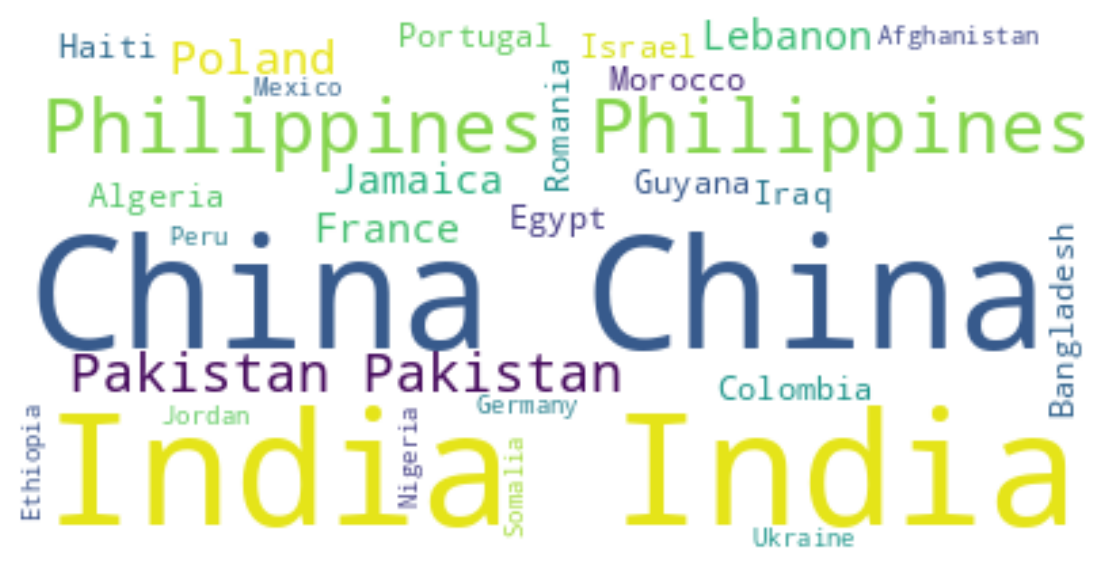

In [28]:
#We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.
wordcloud = WordCloud(background_color='white').generate(word_str)
fig = plt.figure(figsize=(14,18))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()